In [1]:
import pandas as pd
import pickle
import datetime
import numpy as np
from collections import Counter
from itertools import chain 
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",5000)

In [2]:
from vod_metrics import LddBaseCidMetricsStore
ldd_metrics = LddBaseCidMetricsStore(
    'ldd', 
    datetime.date.today() - datetime.timedelta(days=14),
    datetime.date.today() - datetime.timedelta(days=1),
)
trex_14days = ldd_metrics.trex_metrics

loading click exposure logs from /data/gangyanyuan/data_rr/user_click_exposure_video_raw_ldd_rr/
metrics found at /data/gangyanyuan/gary/helper_utils/vod_metrics/logs/20230809_20230822.parquet
base_cid_show_pv_90_quantile: 32953.399999999994
base_cid_show_pv_75_quantile: 7871.0
base_cid_ctr_50_quantile: 0.017953321364452424
base_cid_ctr_90_quantile: 0.08290968443200493
base_cid_ctr_55_quantile: 0.02336192694571477


In [3]:
trex_14days.head()

activeName,baseCid,cid,algo_type,click,show
0,AAOYWVEUKw1623930585544,HHWogIUeqK1611912236143,trex,0.0,1.0
1,AAOYWVEUKw1623930585544,KRtWmkoNsR1611902720417,trex,0.0,1.0
2,AAOYWVEUKw1623930585544,atbDkNvYLD1652778457981,trex,0.0,1.0
3,AAOYWVEUKw1623930585544,cPkceFEDXy1622805529564,trex,0.0,1.0
4,AAOYWVEUKw1623930585544,sEshKtnUnF1671160038783,trex,0.0,1.0


In [4]:
date = datetime.date.today() - datetime.timedelta(days=14)
def get_data_range(diff=1, date_range=14):
    df = []
    for i in range(date_range):
        date = (datetime.datetime.today()-datetime.timedelta(diff) - datetime.timedelta(1+i)).strftime("%Y%m%d")
        try:
            data = pd.read_parquet(f"../data_rr/vod_ldd_ecpm_daily_details_rr/year=2023/month={int(date[4:6])}/day={int(date[6:8])}")
            df.append(data)
        except:
            print('path not exists',f"../data_rr/vod_ldd_ecpm_daily_details_rr/year=2023/month={int(date[4:6])}/day={int(date[6:8])}")
    df = pd.concat(df)
    return df
income_14days = get_data_range(diff=1, date_range=14)
income_14days.head()

,dnum,cid,columnsName,algo_type,baseCid,baseName,cidName,position,dateTime,pay_amt,producettype,frompagelevel1,vod_clk_cnt,sd_cpm,sd_income,col_algo_eps_pv,launcher_clk_cnt,income_filter,col_algo_cpm_filter,timestamp
0,540481969,rDQKmlsNeW1676876134133,【猜你喜欢↓↓↓】,replace,PejtkSzsEW1618974022208,神兽金刚四 邦宝历险记,神兽金刚之地球之盾,"{0,2}",2023-08-21 12:01:37,89.00,套餐,1.0,2,468.4211,89.0000,1902679,0,89.0,0.26962,2023-08-21 04:05:03
1,611155529,hxhmkSpAXi1670463115746,【猜你喜欢↓↓↓】,replace,MYqzwTgTUJ1670464318083,小志和玩具第二十季,小志和玩具第七季,"{0,1}",2023-08-21 13:30:47,28.00,套餐,1.0,2,10.5303,28.0000,1902679,0,28.0,0.26962,2023-08-21 05:36:13
2,590295599,COPAnoLLWG1605582357423,【猜你喜欢↓↓↓】,replace,KGGJWPMdPi1642562281891,汪汪队之超威救援先锋,迷你特工队之超级恐龙力量,"{0,6}",2023-08-21 18:58:29,19.00,套餐,1.0,2,3.4596,9.5000,1902679,0,19.0,0.26962,2023-08-21 11:06:43
3,529037819,DZnXRryQAT1601214717245,【猜你喜欢↓↓↓】,replace,jAGHvKfxCC1601282023158,小猪佩奇全集,小猪佩奇第一季,"{0,0}",2023-08-21 10:39:46,1.00,套餐,1.0,1,0.3852,1.0000,1902679,0,1.0,0.26962,2023-08-21 02:42:50
4,523498619,jAGHvKfxCC1601282023158,【猜你喜欢↓↓↓】,replace,EcjztyVhJg1689303456414,小猪佩奇第九季续集,小猪佩奇全集,"{0,0}",2023-08-21 11:44:11,1.00,套餐,1.0,1,0.2264,0.5000,1902679,0,1.0,0.26962,2023-08-21 03:51:38


In [5]:
merged_df = trex_14days.merge(income_14days, on=['baseCid', 'cid'], how='left')
merged_df['sd_income'] = merged_df['sd_income'].fillna(0)
df = merged_df[['baseCid', 'cid', 'click', 'show', 'sd_income']]
df

,baseCid,cid,click,show,sd_income
0,AAOYWVEUKw1623930585544,HHWogIUeqK1611912236143,0.0,1.0,0
1,AAOYWVEUKw1623930585544,KRtWmkoNsR1611902720417,0.0,1.0,0
2,AAOYWVEUKw1623930585544,atbDkNvYLD1652778457981,0.0,1.0,0
3,AAOYWVEUKw1623930585544,cPkceFEDXy1622805529564,0.0,1.0,0
4,AAOYWVEUKw1623930585544,sEshKtnUnF1671160038783,0.0,1.0,0
...,...,...,...,...,...
1837907,zzxKJWacQT1606136692129,ljbNAMEBUW1654089620452,1.0,6.0,0
1837908,zzxKJWacQT1606136692129,lybMtdksni1676528820552,0.0,30.0,0
1837909,zzxKJWacQT1606136692129,oWlMoQcTbV1654130666853,1.0,69.0,0
1837910,zzxKJWacQT1606136692129,sZEHvqQuIj1651830040822,0.0,1.0,0


In [6]:
ip_media = pd.read_parquet("../data_rr/ldd_media/child_tags_20220215.parquet")
df = df.merge(ip_media[['cid', 'ip']], on='cid', how='left', suffixes=('_of_cid', '_of_cid'))
df = df.merge(ip_media[['cid', 'ip']], left_on='baseCid', right_on='cid', how='left', suffixes=('', '_of_baseCid')).drop('cid_of_baseCid', axis=1)
df

,baseCid,cid,click,show,sd_income,ip,ip_of_baseCid
0,AAOYWVEUKw1623930585544,HHWogIUeqK1611912236143,0.0,1.0,0,NaN,None
1,AAOYWVEUKw1623930585544,KRtWmkoNsR1611902720417,0.0,1.0,0,NaN,None
2,AAOYWVEUKw1623930585544,atbDkNvYLD1652778457981,0.0,1.0,0,NaN,None
3,AAOYWVEUKw1623930585544,cPkceFEDXy1622805529564,0.0,1.0,0,睡衣小英雄,None
4,AAOYWVEUKw1623930585544,sEshKtnUnF1671160038783,0.0,1.0,0,NaN,None
...,...,...,...,...,...,...,...
1837907,zzxKJWacQT1606136692129,ljbNAMEBUW1654089620452,1.0,6.0,0,NaN,NaN
1837908,zzxKJWacQT1606136692129,lybMtdksni1676528820552,0.0,30.0,0,NaN,NaN
1837909,zzxKJWacQT1606136692129,oWlMoQcTbV1654130666853,1.0,69.0,0,NaN,NaN
1837910,zzxKJWacQT1606136692129,sZEHvqQuIj1651830040822,0.0,1.0,0,NaN,NaN


In [7]:
ip_baseCid_distribution = df['ip_of_baseCid'].value_counts(dropna=False)
ip_distribution = df['ip'].value_counts(dropna=False)
ip_baseCid_distribution, ip_distribution

(NaN       1288972
 奥特曼         20523
 猪猪侠         20305
 芭比          16223
 汪汪队         14333
            ...   
 达菲鸭             7
 口袋森林            7
 蔬菜不寂寞           7
 水木开心学园          7
 唐老鸭             7
 Name: ip_of_baseCid, Length: 297, dtype: int64,
 NaN      1295276
 汪汪队        26866
 奥特曼        24152
 猪猪侠        21514
 猫和老鼠       19473
           ...   
 兔小蛋            3
 派乐萌奇           2
 快乐可可狮          2
 小主人            1
 匹诺曹            1
 Name: ip, Length: 266, dtype: int64)

In [32]:
# for all data
all_ip_of_baseCid = df['ip_of_baseCid'].value_counts().index.tolist()
all_data = df[df['ip_of_baseCid'].isin(all_ip_of_baseCid)]

In [33]:
sum_all = all_data.groupby(['ip_of_baseCid', 'ip']).agg({
    'click': 'sum',
    'show': 'sum',
    'sd_income': 'sum'
}).reset_index()
sum_all['sd_income'] = sum_all['sd_income'].astype('float64')
sum_all['ctr'] = np.where(sum_all['show']!=0, sum_all['click']/ sum_all['show'], 0)
sum_all['ecpm'] = sum_all['sd_income']/ sum_all['show']
sum_all

,ip_of_baseCid,ip,click,show,sd_income,ctr,ecpm
0,,大卫,0.0,6.0,0.0,0.0,0.0
1,,小品一家人,0.0,1.0,0.0,0.0,0.0
2,,汪汪队,0.0,10.0,0.0,0.0,0.0
3,,猫和老鼠,0.0,1.0,0.0,0.0,0.0
4,,精灵梦叶罗丽,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5820,龟兔赛跑,百变布鲁可,0.0,1.0,0.0,0.0,0.0
5821,龟兔赛跑,益智宝贝,0.0,1.0,0.0,0.0,0.0
5822,龟兔赛跑,萌浪兔,0.0,4.0,0.0,0.0,0.0
5823,龟兔赛跑,萌牙兔,0.0,10.0,0.0,0.0,0.0


In [37]:
# ip分类为同系列和非同系列
equal_df = sum_all[sum_all['ip'] == sum_all['ip_of_baseCid']]
not_equal_df = sum_all[sum_all['ip'] != sum_all['ip_of_baseCid']]
not_equal_grouped = not_equal_df.groupby('ip_of_baseCid').sum().reset_index()
not_equal_grouped['ip'] = '非-' + not_equal_grouped['ip_of_baseCid']

final_df_all = pd.concat([equal_df, not_equal_grouped], ignore_index=True)
final_df_all = final_df_all[['ip_of_baseCid', 'ip', 'sd_income', 'click', 'show', 'ctr', 'ecpm']]
final_df_all

,ip_of_baseCid,ip,sd_income,click,show,ctr,ecpm
0,23号牛乃唐,23号牛乃唐,392.0,3091.0,37694.0,0.082002,0.01040
1,Hello Kitty,Hello Kitty,0.0,46.0,1762.0,0.026107,0.00000
2,RunFox,RunFox,0.0,0.0,110.0,0.000000,0.00000
3,kiki玩具,kiki玩具,14.0,8747.0,107412.0,0.081434,0.00013
4,一禅和尚,一禅和尚,0.0,2.0,832.0,0.002404,0.00000
...,...,...,...,...,...,...,...
504,鸟宝宝啾啾啾,非-鸟宝宝啾啾啾,0.0,0.0,18.0,0.000000,0.00000
505,麦咭,非-麦咭,0.0,0.0,16.0,0.000000,0.00000
506,麦圈可可,非-麦圈可可,0.0,0.0,3.0,0.000000,0.00000
507,鼠来宝,非-鼠来宝,0.0,3.0,195.0,0.197203,0.00000


In [40]:
final_df_all['ip_same'] = final_df_all['ip_of_baseCid'] == final_df_all['ip']
grouped_data = final_df_all.groupby('ip_same').mean()[['sd_income', 'click', 'show', 'ctr', 'ecpm']]
grouped_data
# False 是非同系列ip的
# True 是同系列ip的

,sd_income,click,show,ctr,ecpm
ip_same,,,,,
False,35.145086,559.597938,37614.137457,0.374963,0.010604
True,561.484587,9490.628440,310952.495413,0.037889,0.001079


When ip_of_baseCid and ip are the same:\
Average sd_income: 561.48\
Average click: 9490.63\
Average show: 310952.5\
Average ctr: 0.0379\
Average ecpm: 0.00108

When ip_of_baseCid and ip are different:\
Average sd_income: 35.14\
Average click: 559.60\
Average show: 37614.14\
Average ctr: 0.375\
Average ecpm: 0.0106

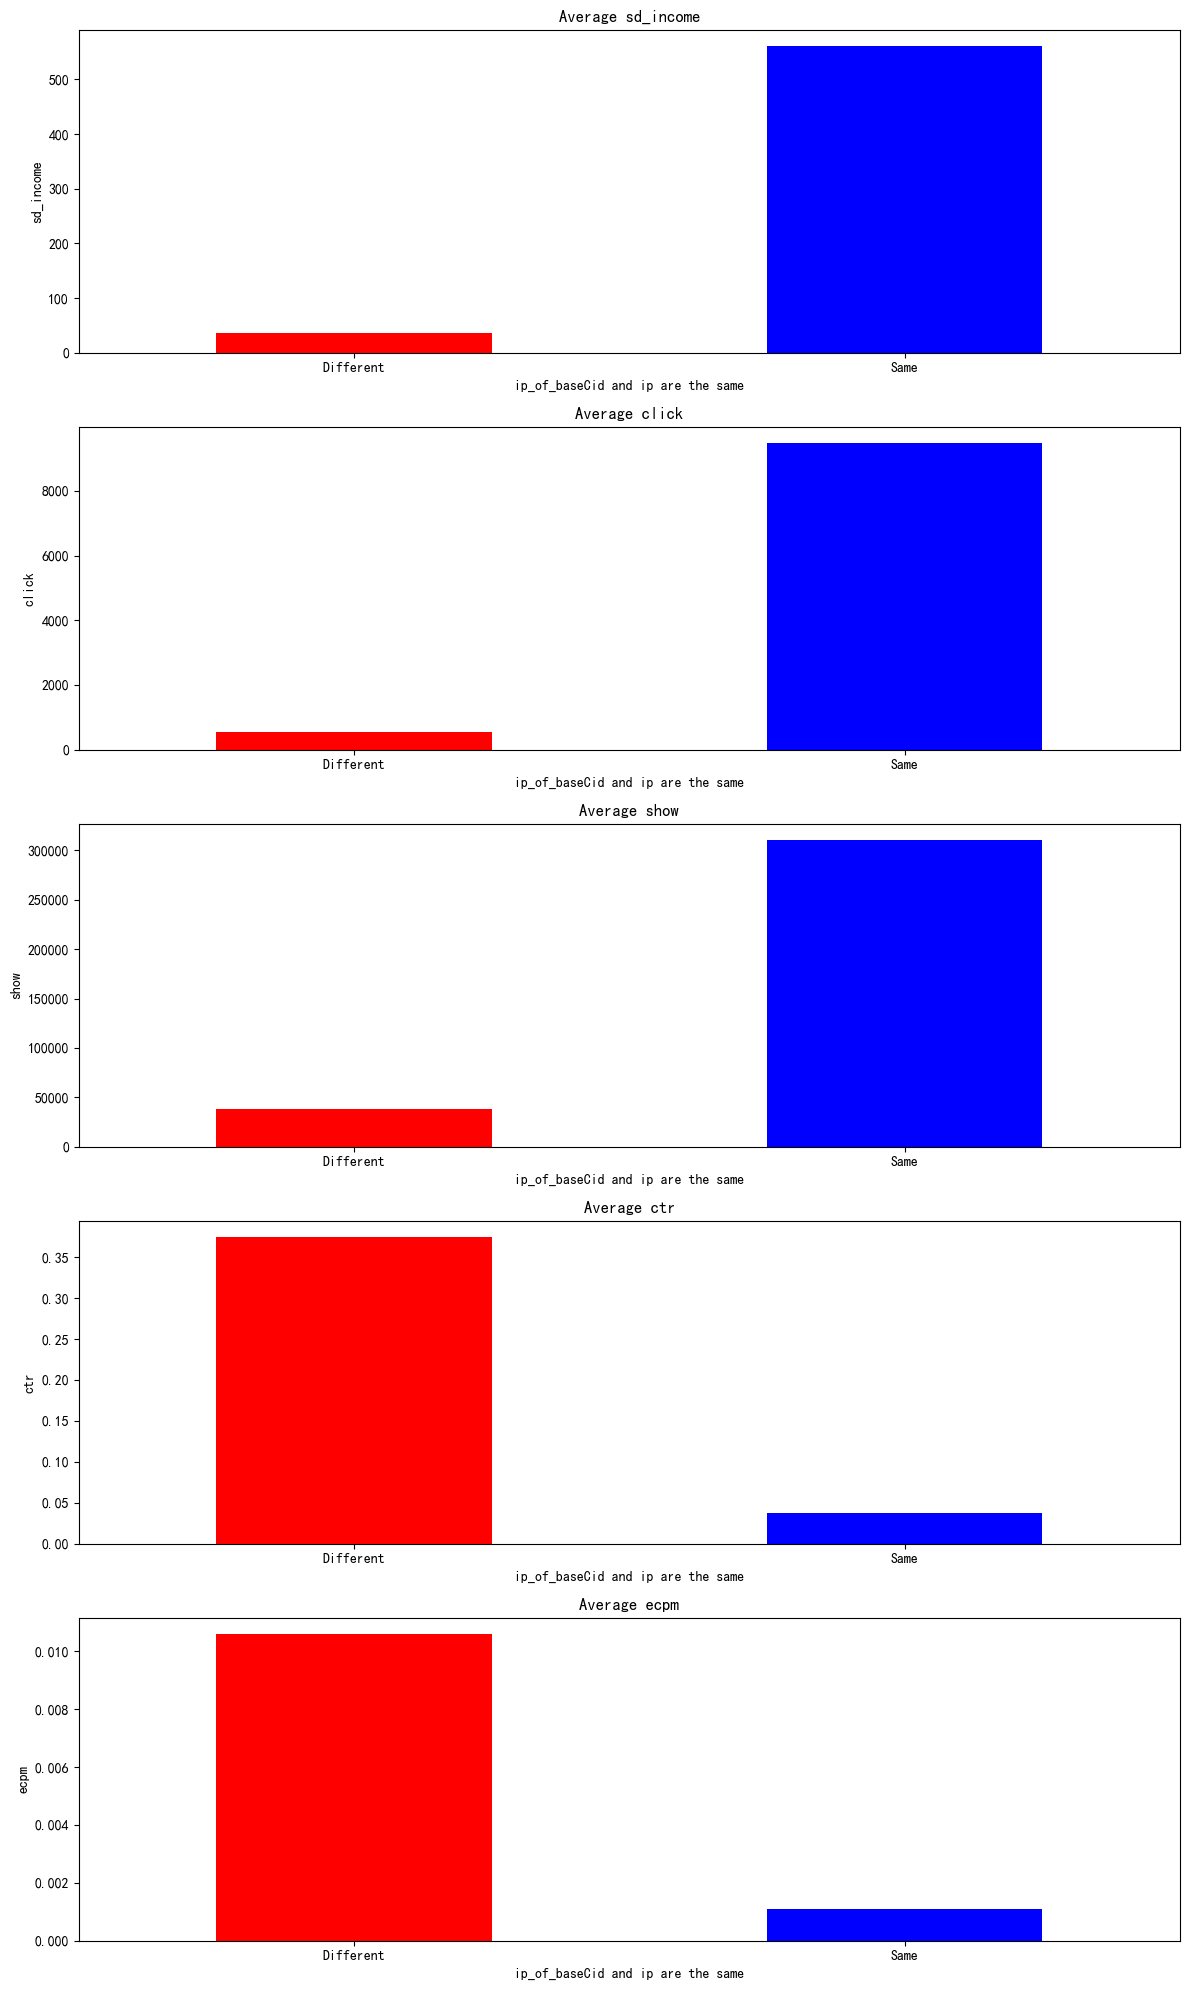

In [42]:
fig, axes = plt.subplots(5, 1, figsize=(12, 20))

for ax, metric in zip(axes, metrics):
    grouped_data[metric].plot(kind='bar', ax=ax, color=['red', 'blue'])
    ax.set_title(f"Average {metric}")
    ax.set_ylabel(metric)
    ax.set_xlabel('ip_of_baseCid and ip are the same')
    ax.set_xticklabels(['Different', 'Same'], rotation=0)

plt.tight_layout()
plt.show()

Average sd_income: When the IPs are the same, the average sd_income is significantly higher.\
Average click: When the IPs are the same, there's a clear increase in the average number of clicks.\
Average show: The pattern continues with the average number of shows being much higher when the IPs are the same.\
Average CTR: While the absolute values of clicks and shows are higher when the IPs are the same, the click-through rate is actually higher when the IPs are different.\
Average ecpm: Similarly to the ctr, the ecpm is higher when the IPs are different.

In [44]:
# 取出拥有前20曝光量的basecid
basecid_show_sum = final_df_all.groupby('ip_of_baseCid')['show'].sum().sort_values(ascending=False)
top_20_basecid_show_sum = basecid_show_sum.head(20)
# 
total_show_sum = basecid_show_sum.sum()
top_20_rate = top_20_basecid_show_sum / total_show_sum
result_show_df = pd.DataFrame({
    'baseCid': top_20_basecid_show_sum.index,
    'sum_show': top_20_basecid_show_sum.values,
    'show_rate': top_20_rate.values
})
result_show_df #曝光量占比

,baseCid,sum_show,show_rate
0,汪汪队,10980499.0,0.139464
1,奥特曼,9918339.0,0.125974
2,奶龙、飞狗moco等,9083133.0,0.115366
3,超级宝贝JoJo,7416941.0,0.094203
4,小猪佩奇,6388512.0,0.081141
5,宝宝巴士,4387946.0,0.055732
6,贝乐虎,2314306.0,0.029394
7,迷你特工队,1836791.0,0.023329
8,碰碰狐,1737336.0,0.022066
9,汽车世界,1723750.0,0.021894


In [48]:
basecid_ctr_sum = final_df_all.groupby('ip_of_baseCid')['ctr'].sum()
top_20_basecid_ctr_sum = basecid_ctr_sum[top_20_basecid_show_sum.index]
#
total_ctr_sum = basecid_ctr_sum.sum()
top_20_ctr_rate = top_20_basecid_ctr_sum / total_ctr_sum
result_ctr_df = pd.DataFrame({
    'baseCid': top_20_basecid_show_sum.index,
    'sum_ctr': top_20_basecid_ctr_sum.values,
    'ctr_rate': top_20_ctr_rate.values
})
result_ctr_df #CTR占比

,baseCid,sum_ctr,ctr_rate
0,汪汪队,2.422229,0.020637
1,奥特曼,0.981173,0.008359
2,奶龙、飞狗moco等,0.837190,0.007133
3,超级宝贝JoJo,0.496795,0.004233
4,小猪佩奇,1.837530,0.015655
5,宝宝巴士,0.659060,0.005615
6,贝乐虎,0.474113,0.004039
7,迷你特工队,0.410225,0.003495
8,碰碰狐,1.072140,0.009134
9,汽车世界,1.186369,0.010108


In [49]:
basecid_ecpm_sum = final_df_all.groupby('ip_of_baseCid')['ecpm'].sum()
top_20_basecid_ecpm_sum = basecid_ecpm_sum[top_20_basecid_show_sum.index]
#
total_ecpm_sum = basecid_ecpm_sum.sum()
top_20_ecpm_rate = top_20_basecid_ecpm_sum / total_ecpm_sum
result_ecpm_df = pd.DataFrame({
    'baseCid': top_20_basecid_show_sum.index,
    'sum_ecpm': top_20_basecid_ecpm_sum.values,
    'ecpm_rate': top_20_ecpm_rate.values
})
result_ecpm_df #ecpm占比

,baseCid,sum_ecpm,ecpm_rate
0,汪汪队,0.003840,0.001156
1,奥特曼,2.432812,0.732571
2,奶龙、飞狗moco等,0.014388,0.004332
3,超级宝贝JoJo,0.004964,0.001495
4,小猪佩奇,0.005411,0.001629
5,宝宝巴士,0.001091,0.000328
6,贝乐虎,0.003371,0.001015
7,迷你特工队,0.209834,0.063186
8,碰碰狐,0.003842,0.001157
9,汽车世界,0.005753,0.001732


## （注：下面的都是基于baseCid的ip特征占比）

/data/dev/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  This is separate from the ipykernel package so we can avoid doing imports until


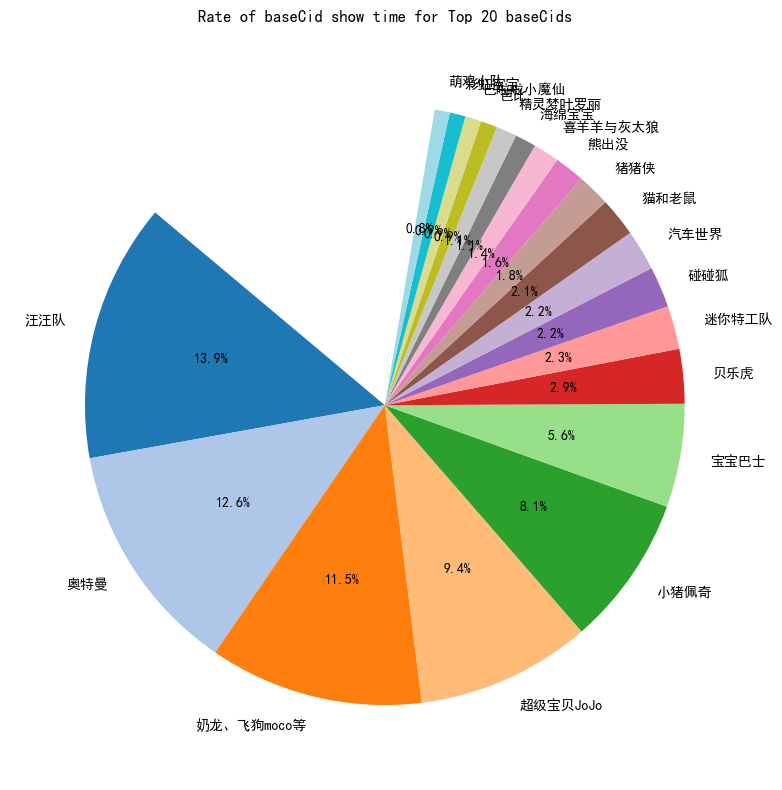

In [50]:
# 曝光量比例图（白色是非前20的）
plt.figure(figsize=(12, 8))
plt.pie(result_show_df['show_rate'], labels=result_ctr_df['baseCid'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", 20))
plt.title('Rate of baseCid show time for Top 20 baseCids')
plt.tight_layout()
plt.show()

/data/dev/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  This is separate from the ipykernel package so we can avoid doing imports until


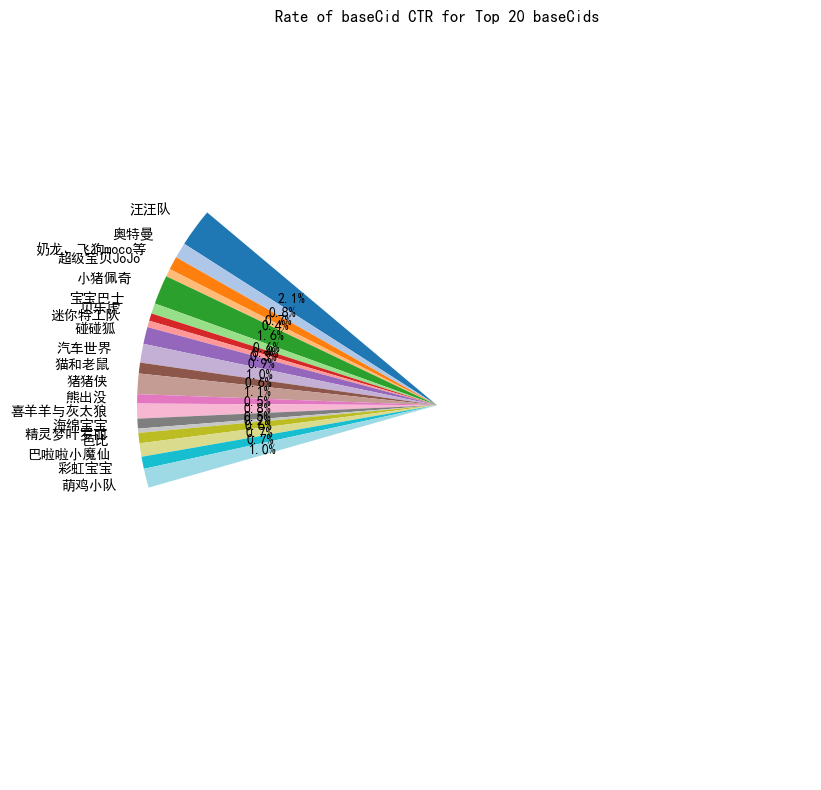

In [54]:
# CTR占比图（白色是非前20的）
plt.figure(figsize=(12, 8))
plt.pie(result_ctr_df['ctr_rate'], labels=result_ctr_df['baseCid'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", 20))
plt.title('Rate of baseCid CTR for Top 20 baseCids')
plt.tight_layout()
plt.show()

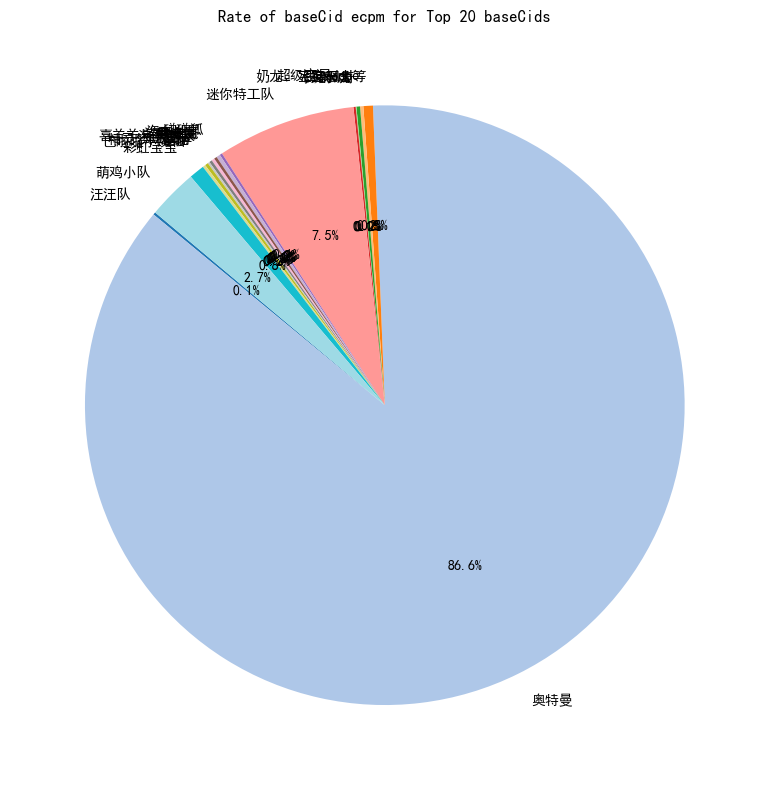

In [56]:
# ecpm占比图（白色是非前20的）
plt.figure(figsize=(12, 8))
plt.pie(result_ecpm_df['sum_ecpm'], labels=result_ecpm_df['baseCid'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", 20))
plt.title('Rate of baseCid ecpm for Top 20 baseCids')
plt.tight_layout()
plt.show()

In [60]:
basecid_click_sum = final_df_all.groupby('ip_of_baseCid')['click'].sum()
top_20_basecid_click_sum = basecid_click_sum[top_20_basecid_show_sum.index]
#
total_click_sum = basecid_click_sum.sum()
top_20_click_rate = top_20_basecid_click_sum / total_click_sum
result_click_df = pd.DataFrame({
    'baseCid': top_20_basecid_show_sum.index,
    'sum_click': top_20_basecid_click_sum.values,
    'rate': top_20_click_rate.values
})
result_click_df #click占比

merged_df = result_show_df.merge(result_ctr_df, on=['baseCid'], how='left')
merged_df = merged_df.merge(result_ecpm_df, on=['baseCid'], how='left')
merged_df = merged_df.merge(result_click_df, on=['baseCid'], how='left')

output = merged_df[['baseCid','show_rate', 'sum_show','sum_click','sum_ctr','sum_ecpm']]
output

,baseCid,show_rate,sum_show,sum_click,sum_ctr,sum_ecpm
0,汪汪队,0.139464,10980499.0,215037.0,2.422229,0.003840
1,奥特曼,0.125974,9918339.0,238443.0,0.981173,2.432812
2,奶龙、飞狗moco等,0.115366,9083133.0,481300.0,0.837190,0.014388
3,超级宝贝JoJo,0.094203,7416941.0,165179.0,0.496795,0.004964
4,小猪佩奇,0.081141,6388512.0,191316.0,1.837530,0.005411
5,宝宝巴士,0.055732,4387946.0,38972.0,0.659060,0.001091
6,贝乐虎,0.029394,2314306.0,27722.0,0.474113,0.003371
7,迷你特工队,0.023329,1836791.0,62024.0,0.410225,0.209834
8,碰碰狐,0.022066,1737336.0,43275.0,1.072140,0.003842
9,汽车世界,0.021894,1723750.0,25158.0,1.186369,0.005753


In [64]:
data2 = pd.read_parquet(f"../data_rr/vod_ldd_ecpm_vip_details_rr")
data2['producettype'].unique()

,dnum,dt,cid,columnsName,algo_type,baseCid,baseName,cidName,position,dateTime,pay_amt,producettype,frompagelevel1,vod_clk_cnt,sd_cpm,sd_income,col_algo_eps_pv,launcher_clk_cnt,income_filter,col_algo_cpm_filter,timestamp,year,month,day,trade_no,product_name,huan_id,buyer_id,pay_amount,client_type,buy_time,end_time,brand,member_type,duration,is_auto_renewal,renewal_times,sign_time,un_sign_time,end_date,buy_date_diff,buy_times,duration_type,amortize_time,buy_date,rk,max_end_time,diff,purchase_order,data_date
0,556510952,20221101,dNUkdLPkci1585650051748,【下滑更多↓】猜你喜欢：一次看过瘾,trex,sTuXtscHGg1660283881528,宝贝赳赳 第四季,超级宝贝JOJO,"{0,2}",2022-11-01 16:25:13,19.00,套餐,1.0,2,37.1261,12.6600,3146201,1,12.666667,0.573672,2022-11-01 08:25:09,2022,11,1,LDD2022110116241BED82E5,少儿会员连续包月（SY8.8）,588685938,20225901939482088881,19.0,TCL-CN-T960-L3,2022-11-01 16:25:09,2022-12-02 16:25:09,children,雷咚咚,31,1,1,2022-11-01 16:25:06,2022-11-01 16:25:47,20221202,354.0,2.0,月卡,2022-11-01 16:25:09.0,20221101,1.0,2022-12-02 16:25:09,31.0,1.0,2022-11-01
1,604273115,20221101,zdJJsEcVXs1611317557673,【下滑更多↓】猜你喜欢：一次看过瘾,trex,SKrdakpQYI1647395959166,益智宝贝2022,益智宝贝,"{0,2}",2022-11-01 16:02:41,9.90,套餐,0.0,1,37.7863,9.9000,3146201,0,9.900000,0.573672,2022-11-01 08:05:59,2022,11,1,LDD2022110116051883F9F0,少儿会员连续包月,685254600,202211011071121801,9.9,TCL-CN-T982-T8EMAX,2022-11-01 16:05:59,2022-12-02 16:05:59,children,雷咚咚,31,1,1,2022-11-01 16:05:57,2022-11-01 16:06:35,20221202,0.0,1.0,月卡,2022-11-01 16:05:59.0,20221101,1.0,2022-12-02 16:05:59,31.0,1.0,2022-11-01
2,510625765,20221101,VXAWBKhnLp1649817722785,【下滑更多↓】猜你喜欢：一次看过瘾,trex,HWRufgGjTF1619589353215,动物世界之认动物学颜色,动物世界之益智故事,"{0,1}",2022-11-01 07:53:35,1.00,套餐,1.0,1,5.1020,1.0000,3146201,0,1.000000,0.573672,2022-11-01 00:04:44,2022,11,1,LDD20221101080312AF50DB,少儿会员连续包月（SY周卡）,543986435,202211011250890020,1.0,TCL-CN-T968A-P2UD-UI3,2022-11-01 08:04:44,2022-11-08 08:04:44,children,雷咚咚,7,1,1,2022-11-01 08:04:42,2022-11-01 08:05:07,20221108,0.0,1.0,周卡,2022-11-01 08:04:44.0,20221101,1.0,2022-11-08 08:04:44,7.0,1.0,2022-11-01
3,529066340,20221101,yceYuUVmDd1623117703825,【下滑更多↓】猜你喜欢：一次看过瘾,trex,PXyCIWRvBQ1623226261572,爱探险的朵拉,朵拉的探险旅程,"{0,0}",2022-11-01 09:09:15,22.00,套餐,1.0,1,1833.3333,22.0000,3146201,0,22.000000,0.573672,2022-11-01 01:34:21,2022,11,1,LDD2022110109331C632050,少儿会员连续包月（SY22）,587277931,202211011752266269,22.0,TCL-CN-MS838C-P3-CUD,2022-11-01 09:34:21,2022-12-02 09:34:21,children,雷咚咚,31,1,1,2022-11-01 09:34:19,0,20221202,141.0,4.0,月卡,2022-11-01 09:34:21.0,20221101,4.0,2022-12-02 09:34:21,31.0,1.0,2022-11-01
4,541619090,20221101,ILWycbVHlc1631860202278,【下滑更多↓】猜你喜欢：一次看过瘾,trex,VOeLnaJHFe1616471411787,迷你特工队格斗戏,迷你特工队之恐龙剧场,"{0,2}",2022-11-01 16:10:13,9.90,套餐,1.0,2,275.0000,9.9000,3146201,0,9.900000,0.573672,2022-11-01 08:16:46,2022,11,1,LDD20221101161521CFD803,少儿会员连续包月,580452603,202211011477455758,9.9,TCL-CN-T960-L2,2022-11-01 16:16:46,2022-12-02 16:16:46,children,雷咚咚,31,1,1,2022-11-01 16:16:43,2022-11-01 16:17:55,20221202,0.0,1.0,月卡,2022-11-01 16:16:46.0,20221101,1.0,2022-12-02 16:16:46,31.0,1.0,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46396,516911563,20230822,BQbEuiIRLv1659950336294,【猜你喜欢↓↓↓】,trex,jyOzbczmax1634633008636,长征先锋,聪明的顺溜之雄鹰小子,"{0,0}",2023-08-22 12:45:06,28.00,套餐,1.0,1,64.0732,28.0000,15451217,0,28.000000,0.117041,2023-08-22 04:47:23,2023,8,22,LDD2023082212474B122C1,少儿会员连续包月（SY28）,548967053,202308221266407634,28.0,TCL-CN-MS838A-C2,2023-08-22 12:47:23,2023-09-22 12:47:23,children,雷咚咚,31,1,1,2023-08-22 12:47:21,2023-08-22 12:47:41,20230922,175.0,6.0,月卡,2023-08-22 12:47:23.0,20230822,6.0,2023-09-22 12:47:23,31.0,1.0,2023-08-22
46397,559090139,20230822,eMBAWLznRp1672826079824,【猜你喜欢↓↓↓】,replace,EOBPtDNhpN1641283772010,恐龙世界,恐龙世界之恐龙大作战,"{0,1}",2023-08-22 07:40:52,6.60,套餐,0.0,1,81.4815,6.6000,1850111,0,6.600000,0.092481,2023-08-21 23:45:28,2023,8,22,LDD2023082207441B5

In [69]:
data2['producettype'].unique()
data2['duration_type'].value_counts()

月卡     26132
周卡     12162
季卡      5947
年卡      1193
半年卡      115
Name: duration_type, dtype: int64

In [71]:
# merge datasets (media info) into trex_14days (records data)
# 1. 加入income
df = trex_14days.merge(income_14days, on=['baseCid', 'cid'], how='left')
df = df[['baseCid', 'cid', 'click', 'show', 'sd_income']]
df['sd_income'] = df['sd_income'].fillna(0) 
# 2. 加入vip_records
df = df.merge(data2, on=['baseCid', 'cid'], how='left')
df = df[['baseCid', 'cid', 'click', 'show', 'sd_income', 'duration_type']]
# 3. 加入ip_info
df = df.merge(ldd_media[['cid', 'ip']], on='cid', how='left', suffixes=('_of_cid', '_of_cid'))
df = df.merge(ldd_media[['cid', 'ip']], left_on='baseCid', right_on='cid', how='left', suffixes=('', '_of_baseCid')).drop('cid_of_baseCid', axis=1)
df

KeyError: "['sd_income'] not in index"